# Load DB from MySQL

In [18]:
from sqlalchemy import create_engine

# Insert Database connection details
user = 'root'
password = 'mYsT4nd4rdQu3rYL4ngu4g3'
host = 'localhost'
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [19]:
import pandas as pd

# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name};', con=engine)

# Display the first few rows of the DataFrame
display(df)

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff
0,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1.333333,1.400000,1.028571,0.987500,-0.5,-1.0,0.346783,0.882338,-0.5,-96.5
1,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1.375000,1.400000,1.171429,1.046512,-0.5,-1.5,0.373301,0.869850,0.0,-103.5
2,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,1.909091,2.166666,0.789474,0.875000,-0.5,-3.0,0.869850,0.373301,0.5,-92.5
3,20700106,22007,1610612766,CHA,Charlotte Hornets,2007-11-14,CHA @ ATL,L,240,41.0,...,1.705882,1.357143,1.121951,0.927711,-0.5,0.5,0.876229,0.359935,7.0,-94.5
4,20700123,22007,1610612760,OKC,Oklahoma City Thunder,2007-11-16,SEA @ ATL,W,290,47.0,...,1.600000,1.769231,0.957447,1.000000,1.5,-1.5,0.896477,0.314940,0.5,-104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,22100241,22021,1610612748,MIA,Miami Heat,2021-11-20,MIA @ WAS,L,240,38.0,...,1.100000,1.500000,0.947368,0.913580,0.5,-3.0,0.478427,0.794582,-0.5,-107.0
17109,22100254,22021,1610612766,CHA,Charlotte Hornets,2021-11-22,CHA @ WAS,W,240,40.0,...,1.277778,2.100000,0.900000,1.032967,0.0,0.0,0.833662,0.414501,-0.5,-112.5
17110,22100321,22021,1610612750,MIN,Minnesota Timberwolves,2021-12-01,MIN @ WAS,L,240,37.0,...,2.428571,1.153846,1.216216,1.034091,-1.0,0.5,0.825526,0.428537,1.0,-112.0
17111,22100334,22021,1610612739,CLE,Cleveland Cavaliers,2021-12-03,CLE @ WAS,W,240,42.0,...,2.100000,1.875000,0.904762,0.921348,0.0,-0.5,0.808318,0.456934,-4.0,-107.0


# Model Training

## Logistic Regression

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Selecting features based on your EDA findings
features = [
    'HomeWinStreak', 'AwayWinStreak', 'EFG_AWAY', 'EFG_HOME', 'FG_PCT_HOME', 
    'FG_PCT_AWAY', 'HomeSpread_AtClose', 'AwayML_Prob', 'HomeML_Prob', 
    'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'AST_HOME', 'AST_AWAY', 
    'AST_TOV_RATIO_AWAY', 'AST_TOV_RATIO_HOME', 'Home_PTS_RollAvg', 'Away_PTS_RollAvg'
]

# Define your target variables
X = df[features]
y = df['HomeWin']  # 1 if home team won, 0 if away team won

In [22]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9342681858019282
Confusion Matrix:
[[1310  116]
 [ 109 1888]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1426
           1       0.94      0.95      0.94      1997

    accuracy                           0.93      3423
   macro avg       0.93      0.93      0.93      3423
weighted avg       0.93      0.93      0.93      3423



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

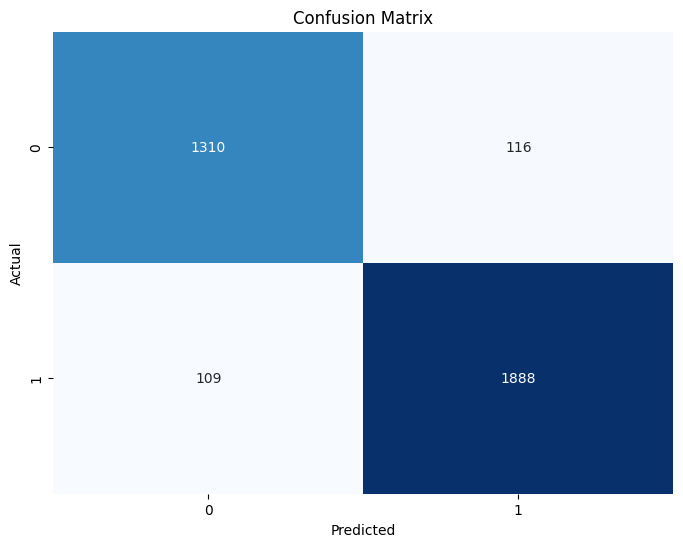

In [26]:
# Plot confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()